In [10]:
import re
import matplotlib.pyplot as plt

def plot_loss_and_ndcg(log_file_path, plot_title):
    epochs = []
    train_losses = []
    ndcg_scores = [] 
    
    with open(log_file_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        if 'epoch' in line and 'training' in line and 'train loss' in line:
            epoch = int(re.search(r'epoch (\d+)', line).group(1))
            loss = float(re.search(r'train loss: ([\d.]+)', line).group(1))
            epochs.append(epoch)
            train_losses.append(loss)

        if 'ndcg@50' in line:
            ndcg_score = float(re.search(r'ndcg@50: ([\d.]+)', line).group(1))
            ndcg_scores.append(ndcg_score)
    
    plt.plot(epochs, train_losses, label='Train Loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Train Loss')
    plt.title(plot_title)
    plt.legend()
    plt.grid()
    plt.show()
    
    # 홀수 번째 ndcg 값을 val_scores에 저장, 짝수 번째 ndcg 값을 test_scores에 저장
    val_scores = ndcg_scores[::2]
    test_scores = ndcg_scores[1::2]
    
    # val score 시각화
    plt.plot(range(1, len(val_scores) + 1), val_scores, label='Validation NDCG@50')
    plt.xlabel('Step')
    plt.ylabel('NDCG@50')
    plt.title('Validation NDCG@50 Scores')
    plt.legend()
    plt.grid()
    plt.show()


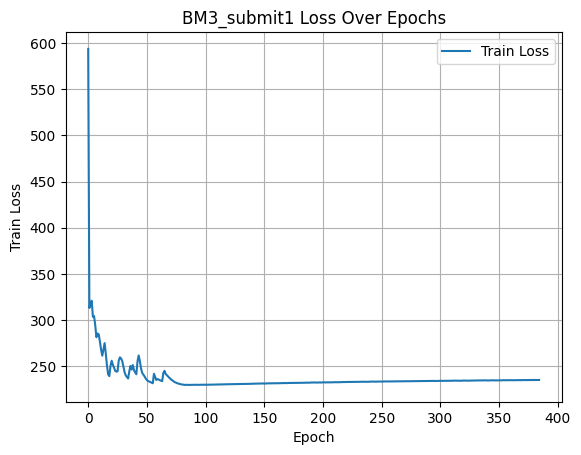

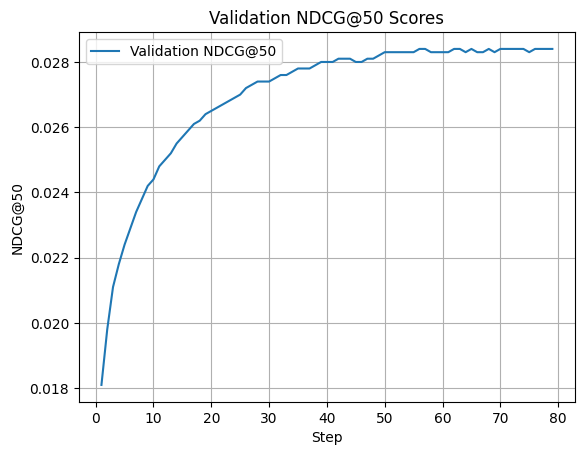

In [11]:
log_file_path = '../saved_submit1/BM3_submit1.log'
plot_title = 'BM3_submit1 Loss Over Epochs'
plot_loss_and_ndcg(log_file_path, plot_title)

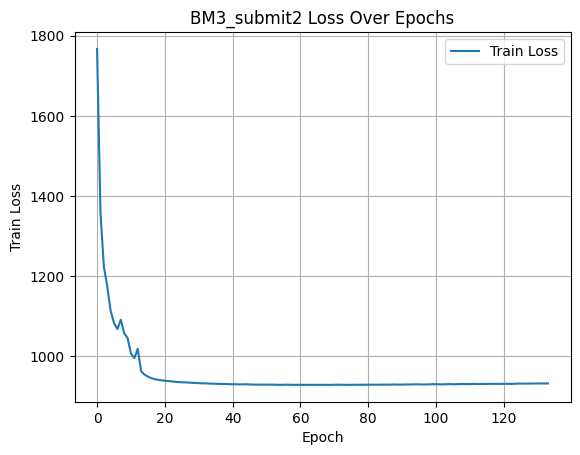

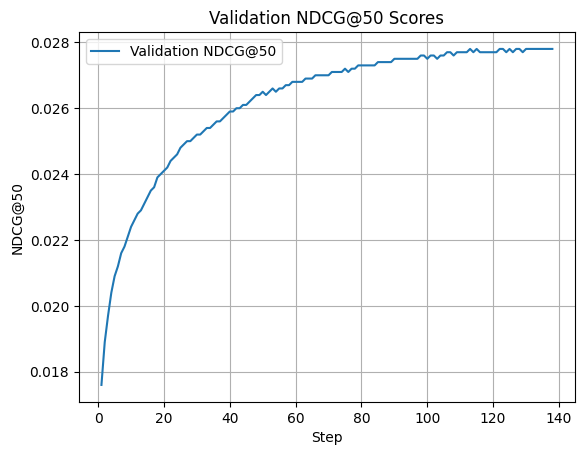

In [12]:
log_file_path = '../saved_submit2/BM3_submit2.log'
plot_title = 'BM3_submit2 Loss Over Epochs'
plot_loss_and_ndcg(log_file_path, plot_title)